In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

In [202]:
df = pd.read_pickle("data/data_for_ml")
df.head()

,Temperatura a 2m °C,velocidade do vento a 10m,umidade relativa a 2 m,pressão hpa,WPD,ano,dia,hora
0,26.43,4.911,69.77,1009.2,117.230155,2004,1,100
1,26.04,4.995,72.70,1009.5,123.526100,2004,1,200
2,25.57,3.355,77.10,1009.7,37.486827,2004,1,300
3,25.23,2.798,78.30,1009.8,21.771341,2004,1,400
4,25.10,2.744,78.10,1010.4,20.557634,2004,1,500


# Spliting train y test

 I split 3 years for train and one for test

In [203]:
df["ano"].value_counts()

2004    8784
2005    8757
2006    8416
2007    8277
Name: ano, dtype: int64

In [204]:
df_train = df[df["ano"]!=2007]
df_test = df[df["ano"]==2007]

In [205]:
df_train["ano"].value_counts()

2004    8784
2005    8757
2006    8416
Name: ano, dtype: int64

In [206]:
df_test["ano"].value_counts()

2007    8277
Name: ano, dtype: int64

# X and Y selection


The goal is WPD at a certain height through the original data

In [81]:
X_train = df_train.iloc[:,:4].values
y_train = df_train.iloc[:,4].values
X_test = df_test.iloc[:,:4].values
y_test = df_test.iloc[:,4].values


In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


Using TensorFlow backend.


In [216]:
def build_regressor(optimizer,units):
    regressor = Sequential()
    egressor.add(Dense(units = units, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = units, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = units, kernel_initializer = 'uniform', activation = 'relu'))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1, kernel_initializer = 'uniform'))
    regressor.compile(optimizer = optimizer, loss = 'mean_squared_error')
    return regressor
regressor = KerasRegressor(build_fn = build_regressor )
parameters = {'batch_size': [25, 32,50],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop'],
              'units': [6,12,18]
             }
            
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 10, n_jobs=-1)

In [21]:
grid_search = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/500
25957/25957 [==============================] - 2s 79us/step - loss: 13097.9894
Epoch 2/500
25957/25957 [==============================] - 2s 70us/step - loss: 1781.2447
Epoch 3/500
25957/25957 [==============================] - 2s 69us/step - loss: 1078.2180
Epoch 4/500
25957/25957 [==============================] - 2s 68us/step - loss: 922.4429
Epoch 5/500
25957/25957 [==============================] - 2s 68us/step - loss: 828.3739
Epoch 6/500
25957/25957 [==============================] - 2s 69us/step - loss: 751.1150
Epoch 7/500
25957/25957 [==============================] - 2s 69us/step - loss: 737.8575
Epoch 8/500
25957/25957 [==============================] - 2s 68us/step - loss: 675.4729
Epoch 9/500
25957/25957 [==============================] - 2s 68us/step - loss: 637.5201
Epoch 10/500
25957/25957 [==============================] - 2s 70us/step - loss: 581.2309
Epoch 11/500
25957/25957 [==============================] - 2s 71us/step - loss: 579.8788
Epoch 12/500
25

25957/25957 [==============================] - 2s 70us/step - loss: 276.7810
Epoch 223/500
25957/25957 [==============================] - 2s 71us/step - loss: 275.1441
Epoch 224/500
25957/25957 [==============================] - 2s 70us/step - loss: 280.9754
Epoch 225/500
25957/25957 [==============================] - 2s 68us/step - loss: 282.1865
Epoch 226/500
25957/25957 [==============================] - 2s 69us/step - loss: 292.6284
Epoch 227/500
25957/25957 [==============================] - 2s 70us/step - loss: 280.9348
Epoch 228/500
25957/25957 [==============================] - 2s 67us/step - loss: 268.5846
Epoch 229/500
25957/25957 [==============================] - 2s 70us/step - loss: 291.0214
Epoch 230/500
25957/25957 [==============================] - 2s 70us/step - loss: 282.7624
Epoch 231/500
25957/25957 [==============================] - 2s 70us/step - loss: 281.5925
Epoch 232/500
25957/25957 [==============================] - 2s 68us/step - loss: 284.8027
Epoch 233/500

25957/25957 [==============================] - 2s 68us/step - loss: 283.3118
Epoch 403/500
25957/25957 [==============================] - 2s 71us/step - loss: 271.5358
Epoch 404/500
25957/25957 [==============================] - 2s 71us/step - loss: 274.7559
Epoch 405/500
25957/25957 [==============================] - 2s 70us/step - loss: 278.6522
Epoch 406/500
25957/25957 [==============================] - 2s 71us/step - loss: 269.3228
Epoch 407/500
25957/25957 [==============================] - 2s 70us/step - loss: 278.4437
Epoch 408/500
25957/25957 [==============================] - 2s 69us/step - loss: 273.2664
Epoch 409/500
25957/25957 [==============================] - 2s 68us/step - loss: 274.6350
Epoch 410/500
25957/25957 [==============================] - 2s 70us/step - loss: 273.0903
Epoch 411/500
25957/25957 [==============================] - 2s 70us/step - loss: 277.7654
Epoch 412/500
25957/25957 [==============================] - 2s 70us/step - loss: 273.6997
Epoch 413/500

In [22]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [23]:
print(best_parameters)

{'batch_size': 32, 'epochs': 500, 'optimizer': 'adam', 'units': 18}


In [24]:
print(best_accuracy)

-36.248748948181635


In [12]:
from sklearn.externals import joblib

In [26]:
joblib.dump(grid_search, 'ann.pkl') 

['ann.pkl']

In [217]:
clf = joblib.load('ann.pkl')

In [218]:
y_pred = clf.predict(X_test)

In [219]:
from sklearn import metrics

In [220]:
resultados = {}

In [221]:
resultados["MAE"]= metrics.mean_absolute_error(y_test, y_pred)

In [222]:
resultados["MSE"]= metrics.mean_squared_error(y_test, y_pred)

In [223]:
resultados["RMSE"]= np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [224]:
resultados["R2"]= metrics.r2_score(y_test, y_pred)

In [225]:
Resultados = pd.DataFrame(resultados,  index=[0])


In [226]:
y_test.mean()

98.43864108091537

In [227]:
Resultados

,MAE,MSE,RMSE,R2
0,9.920902,237.919934,15.424653,0.982879


# Charts

In [230]:
y_test.shape[0]

8277

In [231]:
df_test.head()

,Temperatura a 2m °C,velocidade do vento a 10m,umidade relativa a 2 m,pressão hpa,WPD,ano,dia,hora
26304,27.529765,2.162,69.009179,1010.6,9.976473,2007,1,100
26305,27.529765,0.080,69.009179,1010.2,0.000505,2007,1,200
26306,27.529765,4.445,69.009179,1010.2,86.666649,2007,1,300
26307,27.529765,4.497,69.009179,1010.5,89.770846,2007,1,400
26308,27.529765,3.145,69.009179,1010.7,30.712503,2007,1,500


In [232]:
df_test["WPD_Pred"] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [233]:
df_test.head()

,Temperatura a 2m °C,velocidade do vento a 10m,umidade relativa a 2 m,pressão hpa,WPD,ano,dia,hora,WPD_Pred
26304,27.529765,2.162,69.009179,1010.6,9.976473,2007,1,100,9.028355
26305,27.529765,0.080,69.009179,1010.2,0.000505,2007,1,200,7.228195
26306,27.529765,4.445,69.009179,1010.2,86.666649,2007,1,300,81.075279
26307,27.529765,4.497,69.009179,1010.5,89.770846,2007,1,400,84.174629
26308,27.529765,3.145,69.009179,1010.7,30.712503,2007,1,500,29.949986


# Average by day


In [234]:
dia = df_test[["WPD","dia","WPD_Pred"]]

In [235]:
dia_mean = dia.groupby("dia").mean()
dia_mean.head()

,WPD,WPD_Pred
dia,,
1,113.106844,102.442734
2,118.732722,108.163483
3,108.892318,98.745621
4,83.252935,76.323631
5,127.549907,115.849998


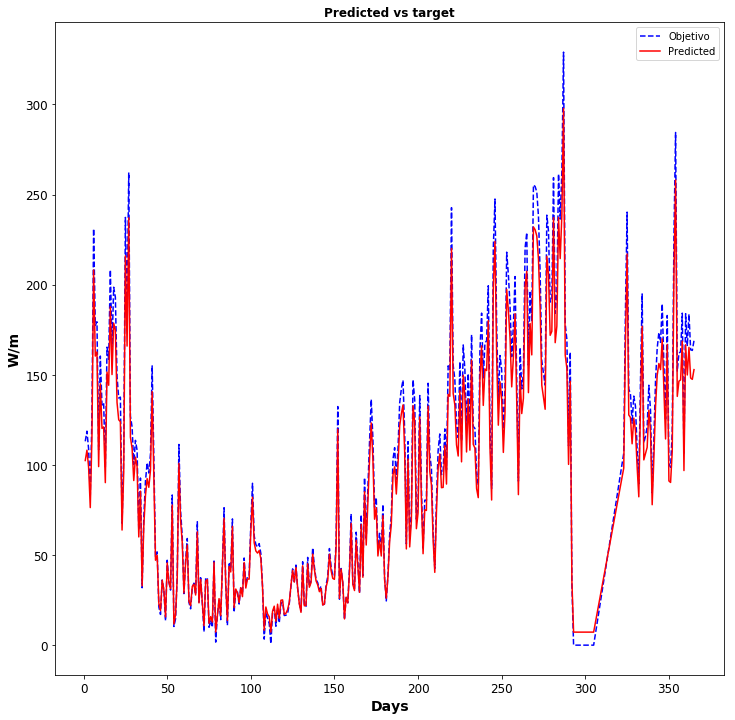

In [340]:
plt.plot(dia_mean["WPD"], color='b', linestyle='--', label= "Objetivo")
plt.plot(dia_mean["WPD_Pred"],"r", label= "Predicted")
plt.title('Predicted vs target',fontweight='bold')
plt.xlabel('Days', fontweight='bold')
plt.ylabel('W/m', fontweight='bold')
plt.legend()

# Average by hour

In [276]:
df_test.head()

,Temperatura a 2m °C,velocidade do vento a 10m,umidade relativa a 2 m,pressão hpa,WPD,ano,dia,hora,WPD_Pred
26304,27.529765,2.162,69.009179,1010.6,9.976473,2007,1,100,9.028355
26305,27.529765,0.080,69.009179,1010.2,0.000505,2007,1,200,7.228195
26306,27.529765,4.445,69.009179,1010.2,86.666649,2007,1,300,81.075279
26307,27.529765,4.497,69.009179,1010.5,89.770846,2007,1,400,84.174629
26308,27.529765,3.145,69.009179,1010.7,30.712503,2007,1,500,29.949986


In [277]:
hora = df_test[["WPD","hora","WPD_Pred"]]
hora.head()

,WPD,hora,WPD_Pred
26304,9.976473,100,9.028355
26305,0.000505,200,7.228195
26306,86.666649,300,81.075279
26307,89.770846,400,84.174629
26308,30.712503,500,29.949986


In [247]:
hora.dtypes

WPD         float64
hora          int64
WPD_Pred    float32
dtype: object

In [248]:
hora["hora"] = hora["hora"].apply(str)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
hora_mean = hora.groupby("hora").mean()
hora_mean.head()

,WPD,WPD_Pred
hora,,
100,61.828475,58.096371
200,43.324365,41.794491
300,32.971760,32.430599
400,27.395360,27.345831
500,20.474642,21.273428


In [319]:
hora_mean1 = hora.groupby("hora").mean()
hora_mean1 = hora_mean1.reset_index()
hora_mean1["hora"] = hora_mean1["hora"].apply(str)
for i in range(len(hora_mean1["hora"])):
    a = hora_mean1.iloc[i,0]
    if len(a) == 3:
        hora_mean1.iloc[i,0] = a[0] + ":" + a[-2:] 
    else:
        hora_mean1.iloc[i,0] = a[0:2] + ":" + a[-2:] 
hora_mean1 = hora_mean1.set_index("hora")
hora_mean1.head()

,WPD,WPD_Pred
hora,,
1:00,61.828475,58.096371
2:00,43.324365,41.794491
3:00,32.971760,32.430599
4:00,27.395360,27.345831
5:00,20.474642,21.273428


In [328]:

plt.rcParams['figure.figsize'] = 12, 12

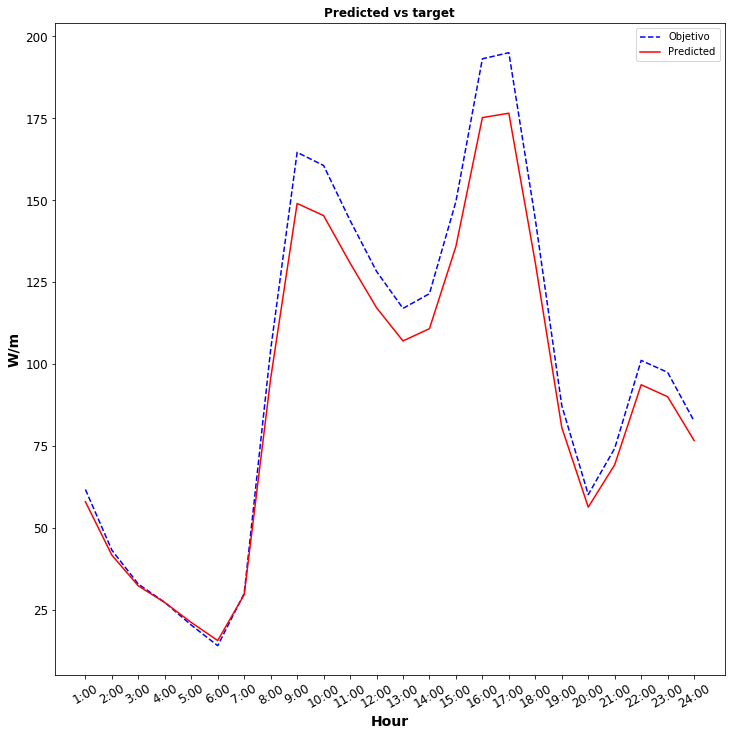

In [342]:
plt.plot(hora_mean1["WPD"],color='b', linestyle='--', label= "Objetivo")
plt.plot(hora_mean1["WPD_Pred"],"r", label= "Predicted")
plt.title('Predicted vs target',fontweight='bold')
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('W/m', fontweight='bold')
plt.xticks(rotation=30)
plt.legend()